<a href="https://colab.research.google.com/github/kxrrym03/Formula1-Analysis-/blob/main/Formula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded = files.upload()

Saving winners_f1_1950_2025_v2.csv to winners_f1_1950_2025_v2.csv


In [3]:
df = pd.read_csv('winners_f1_1950_2025_v2.csv')
df.shape

(1142, 9)

In [4]:
df.head()

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
0,1950-05-13,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,02:13:23,70.0,1950
1,1950-05-21,Europe,Monaco,Circuit de Monaco,Juan Manuel Fangio,Alfa Romeo,03:13:18,100.0,1950
2,1950-05-30,North America,United States,Indianapolis Motor Speedway,Johnnie Parsons,Kurtis Kraft Offenhauser,02:46:55,138.0,1950
3,1950-06-04,Europe,Switzerland,Circuit Bremgarten,Nino Farina,Alfa Romeo,02:02:53,42.0,1950
4,1950-06-18,Europe,Belgium,Circuit de Spa Francorchamps,Juan Manuel Fangio,Alfa Romeo,02:47:26,35.0,1950


In [5]:
df.tail()

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
1137,2025-06-15,North America,Canada,Circuit Gilles Villeneuve,George Russell,Mercedes,01:31:52,70.0,2025
1138,2025-06-29,Europe,Austria,Red Bull Ring,Lando Norris,McLaren,01:23:47,70.0,2025
1139,2025-07-06,Europe,Great Britain,Silverstone Circuit,Lando Norris,McLaren,01:37:15,52.0,2025
1140,2025-07-27,Europe,Belgium,Circuit de Spa Francorchamps,Oscar Piastri,McLaren,01:25:22,44.0,2025
1141,2025-08-03,Europe,Hungary,Hungaroring,Lando Norris,McLaren,01:35:21,70.0,2025


In [6]:
# Covert date to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Convert laps to integer
df['laps'] = df['laps'].fillna(0).astype(int)
# Removing non-breaking spaces and whitespace on winner_name
df['winner_name'] = df['winner_name'].str.replace('\xa0', ' ', regex=True).str.strip()

def time_to_seconds(time_str):
    try:
        parts = time_str.split(':')
        if len(parts) == 3:
            h, m, s = map(float, parts)
            return int(h*3600 + m*60 + s)
        elif len(parts) == 2:
            m, s = map(float, parts)
            return int(m*60 + s)
        else:
            return None
    except:
        return None

df['time_seconds'] = df['time'].apply(time_to_seconds)


In [7]:
df.isnull().sum()

,0
date,0
continent,0
grand_prix,0
circuit,0
winner_name,0
team,0
time,0
laps,0
year,0
time_seconds,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1142 non-null   datetime64[ns]
 1   continent     1142 non-null   object        
 2   grand_prix    1142 non-null   object        
 3   circuit       1142 non-null   object        
 4   winner_name   1142 non-null   object        
 5   team          1142 non-null   object        
 6   time          1142 non-null   object        
 7   laps          1142 non-null   int64         
 8   year          1142 non-null   int64         
 9   time_seconds  1142 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 89.3+ KB


In [10]:
df.describe()

,date,laps,year,time_seconds
count,1142,1142.000000,1142.000000,1142.000000
mean,1993-07-10 21:34:59.474605952,64.617338,1992.999124,6361.399299
min,1950-05-13 00:00:00,1.000000,1950.000000,207.000000
25%,1977-03-12 06:00:00,54.000000,1977.000000,5435.750000
50%,1995-05-21 00:00:00,64.000000,1995.000000,5884.500000
75%,2011-10-05 12:00:00,72.000000,2011.000000,6780.500000
max,2025-08-03 00:00:00,200.000000,2025.000000,14679.000000
std,NaN,20.065139,20.850097,1637.907573


In [11]:

df.dtypes

,0
date,datetime64[ns]
continent,object
grand_prix,object
circuit,object
winner_name,object
team,object
time,object
laps,int64
year,int64
time_seconds,int64


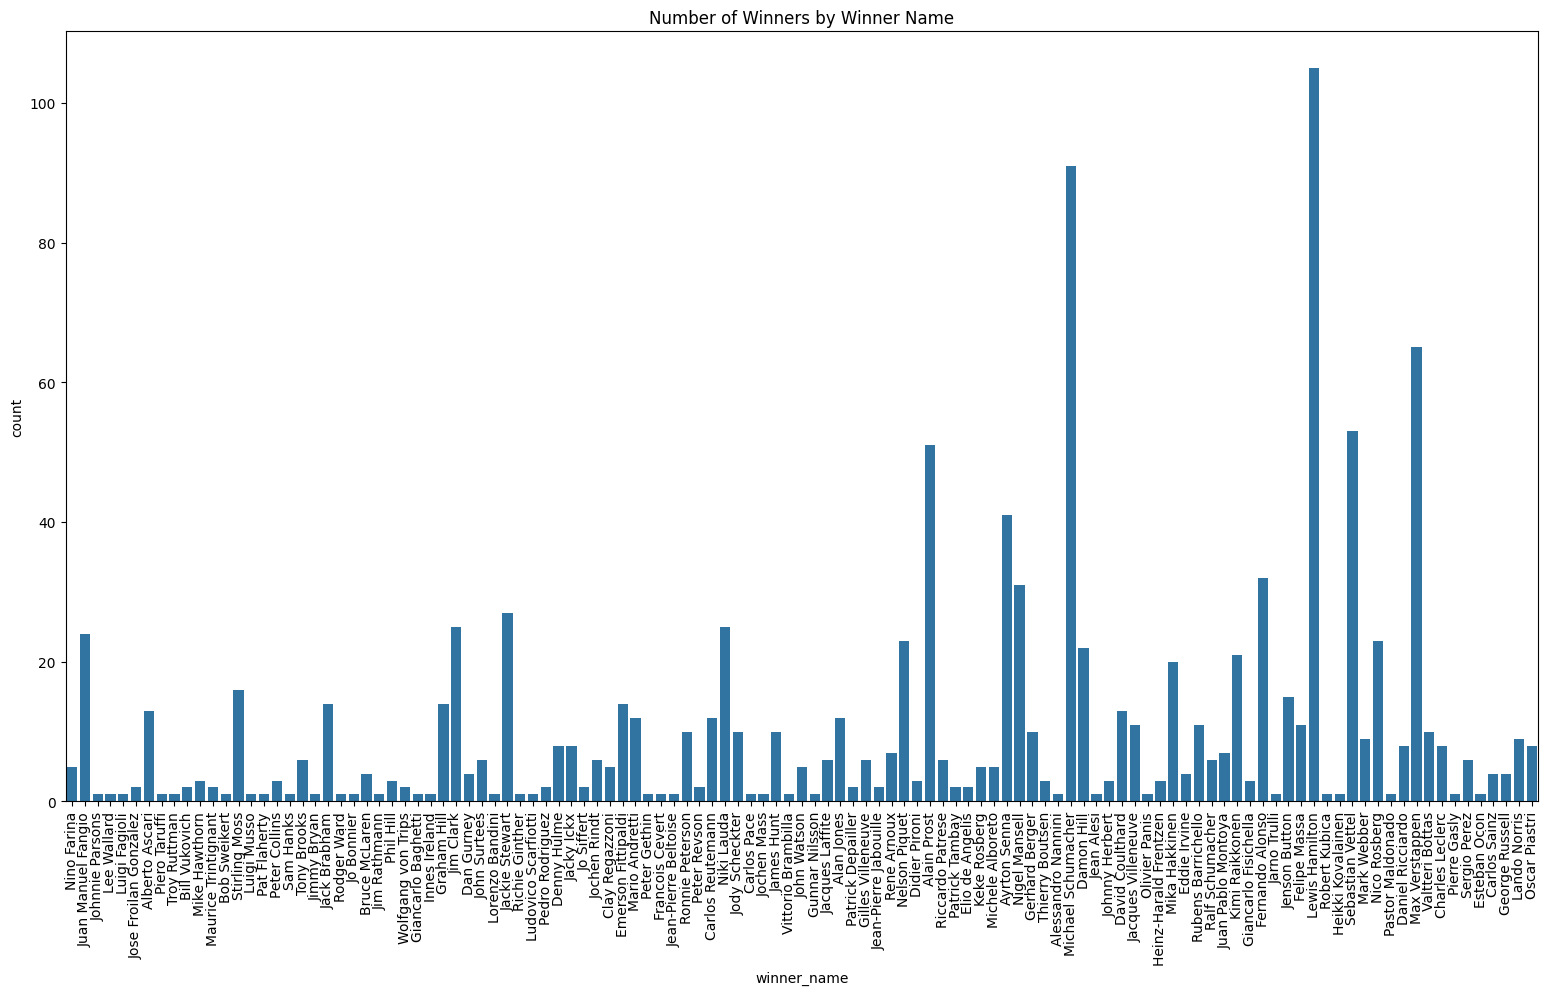

In [12]:
plt.figure(figsize=(19,10))
sns.countplot(data=df, x='winner_name')
plt.xticks(rotation=90)
plt.title('Number of Winners by Winner Name')
plt.show()

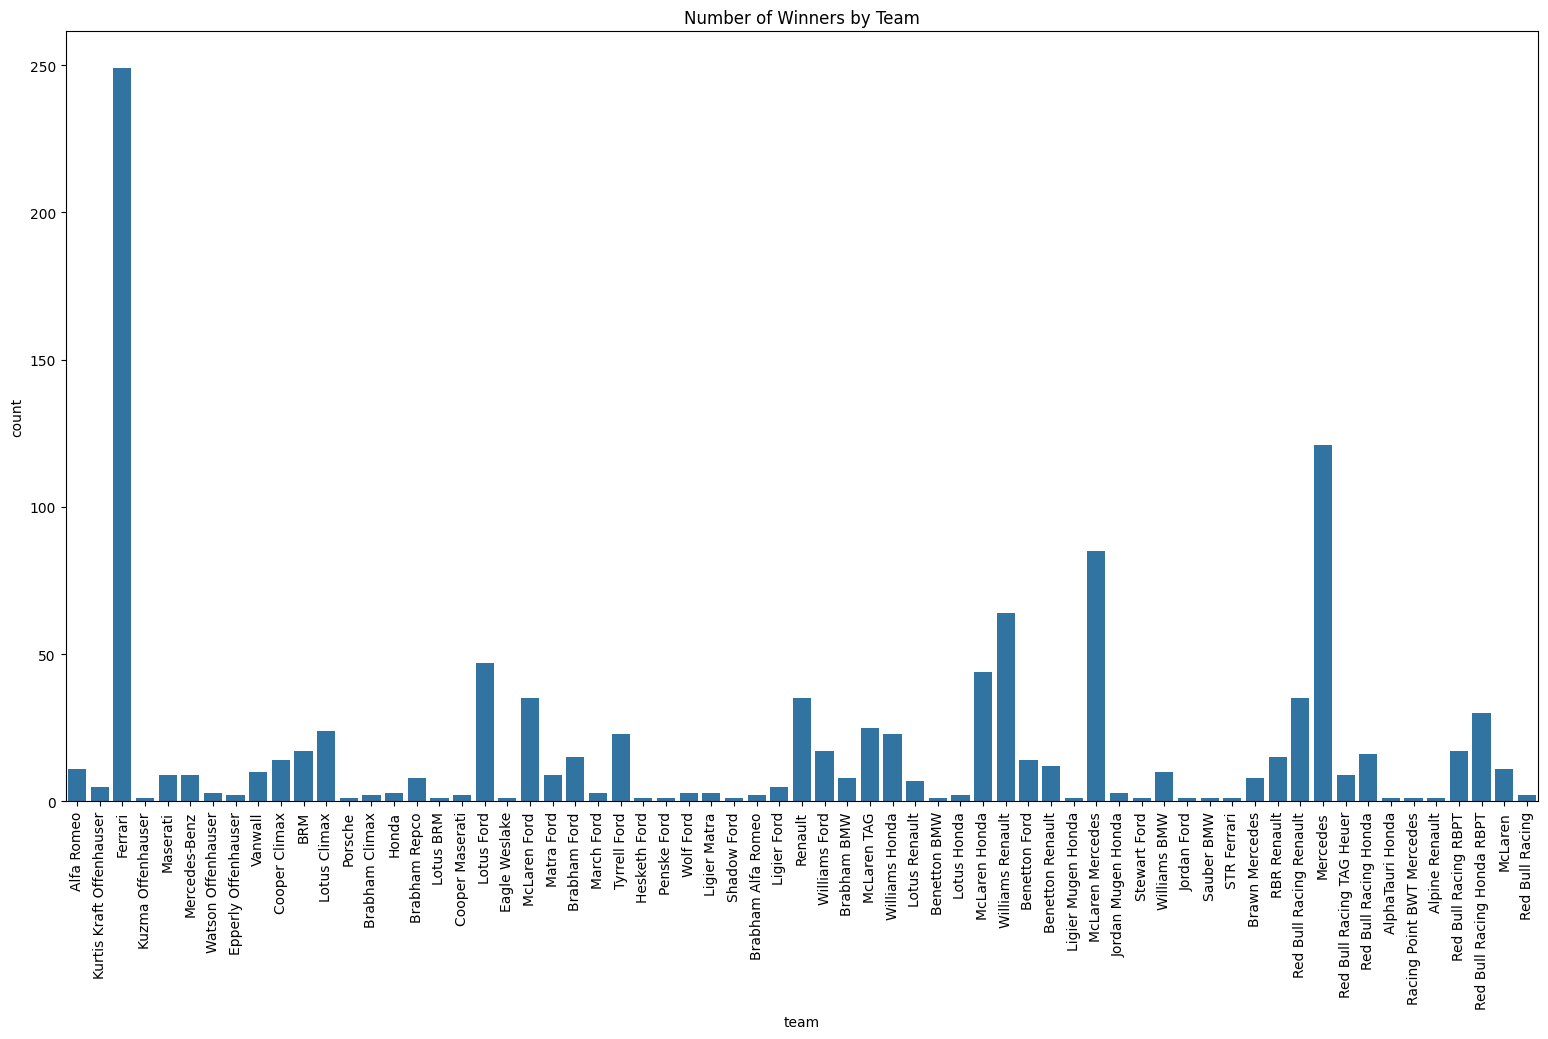

In [13]:
plt.figure(figsize=(19,10))
sns.countplot(data=df, x='team')
plt.xticks(rotation=90)
plt.title('Number of Winners by Team')
plt.show()

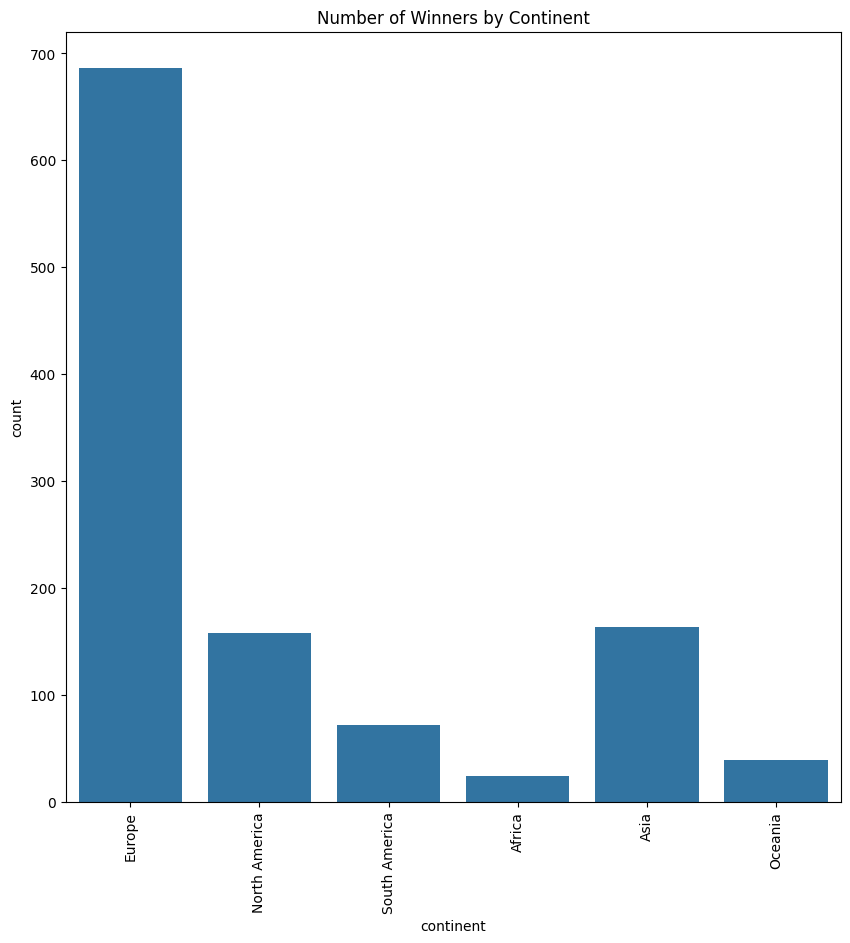

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='continent')
plt.xticks(rotation=90)
plt.title('Number of Winners by Continent')
plt.show()

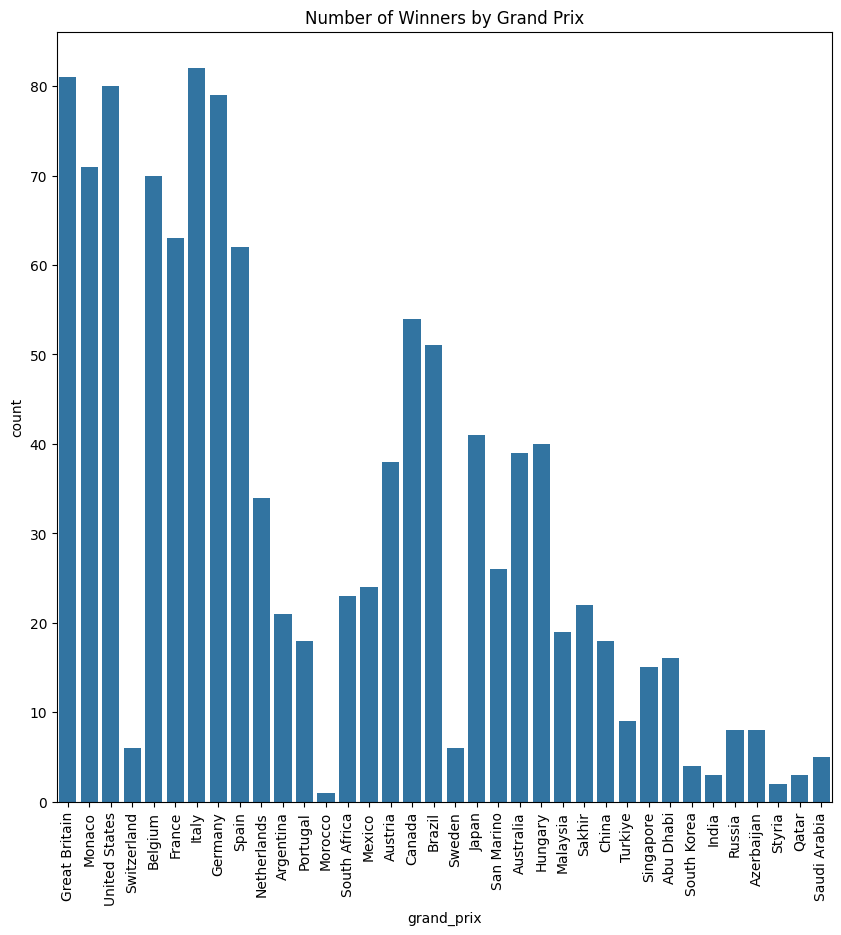

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='grand_prix')
plt.xticks(rotation=90)
plt.title('Number of Winners by Grand Prix')
plt.show()

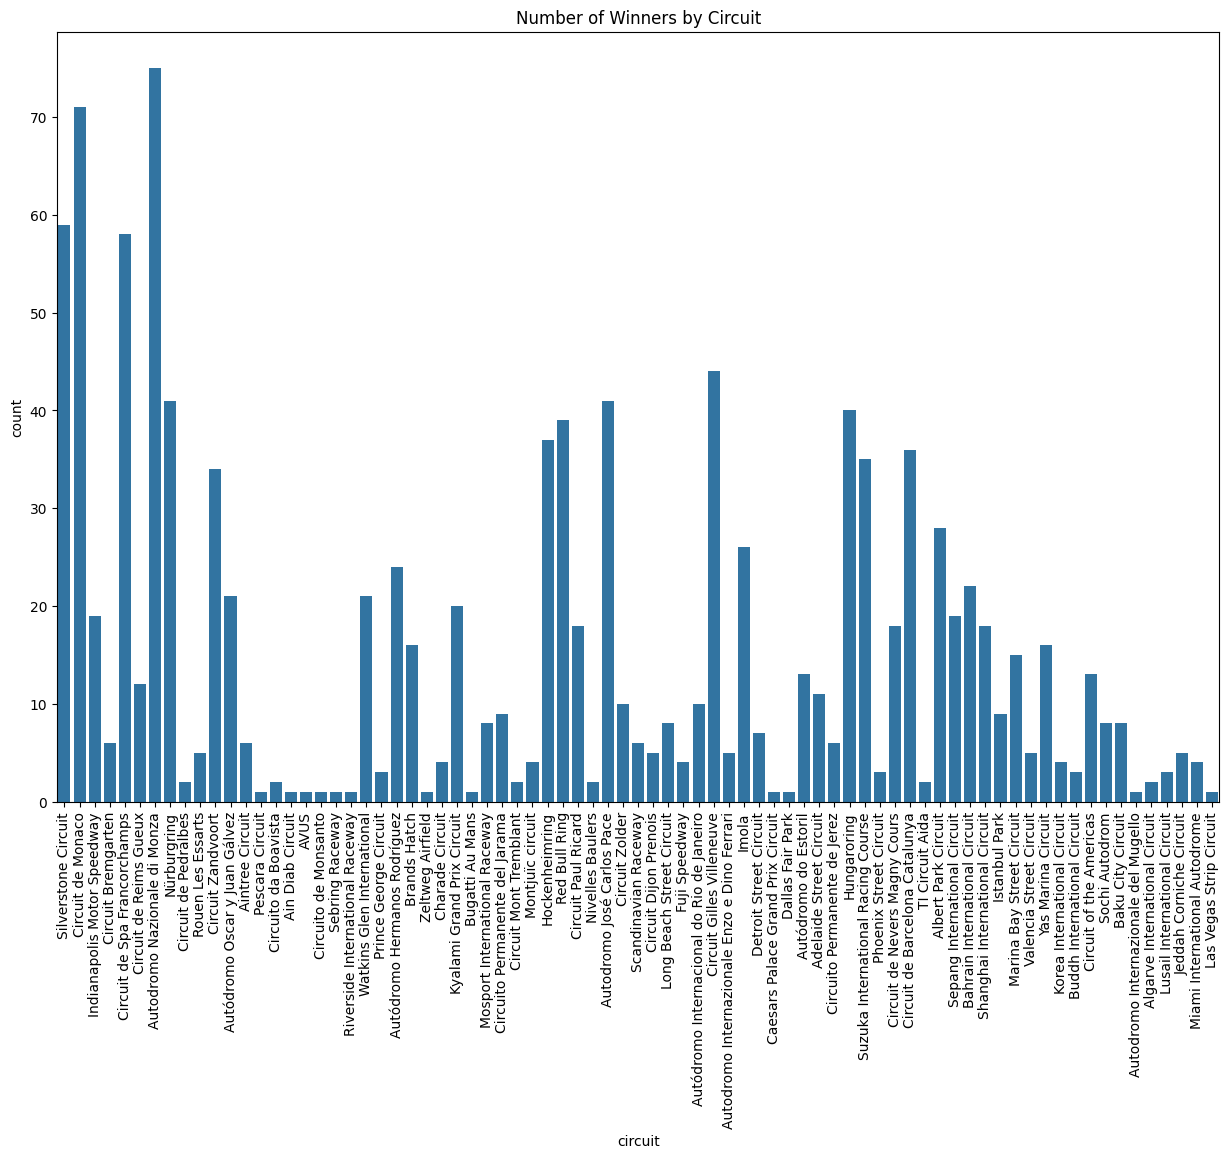

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='circuit')
plt.xticks(rotation=90)
plt.title('Number of Winners by Circuit')
plt.show()

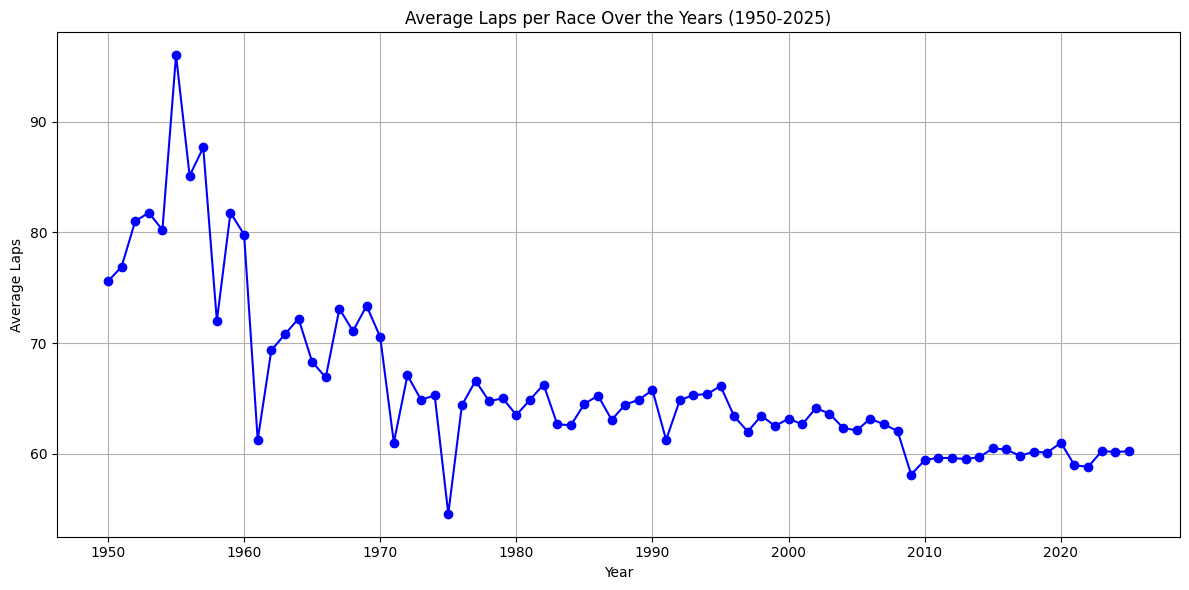

In [17]:
yearly_laps = df.groupby('year')['laps'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_laps['year'], yearly_laps['laps'], marker='o', linestyle='-', color='b')
plt.title('Average Laps per Race Over the Years (1950-2025)')
plt.xlabel('Year')
plt.ylabel('Average Laps')
plt.grid(True)
plt.tight_layout()
plt.show()

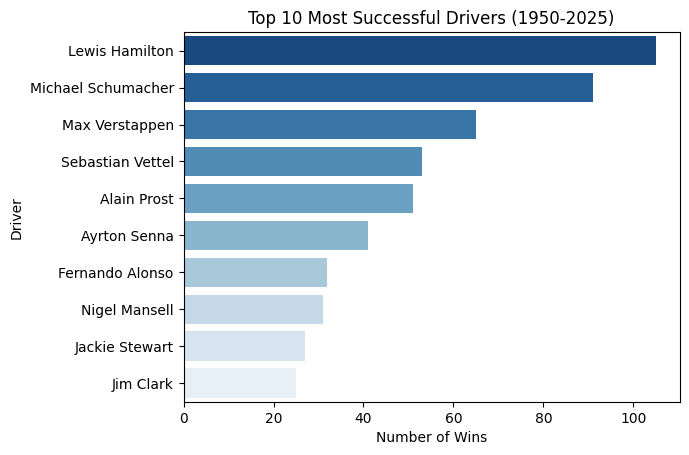

In [18]:
# Most successful drivers
driver_wins = df['winner_name'].value_counts().head(10)

plt.figure()
sns.barplot(x=driver_wins.values, y=driver_wins.index, palette="Blues_r")
plt.title("Top 10 Most Successful Drivers (1950-2025)")
plt.xlabel("Number of Wins")
plt.ylabel("Driver")
plt.show()

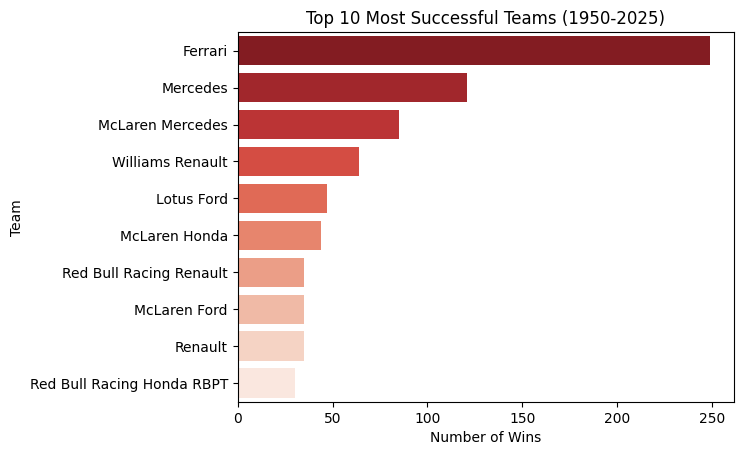

In [19]:
# Most successful teams
team_wins = df['team'].value_counts().head(10)

plt.figure()
sns.barplot(x=team_wins.values, y=team_wins.index, palette="Reds_r")
plt.title("Top 10 Most Successful Teams (1950-2025)")
plt.xlabel("Number of Wins")
plt.ylabel("Team")
plt.show()

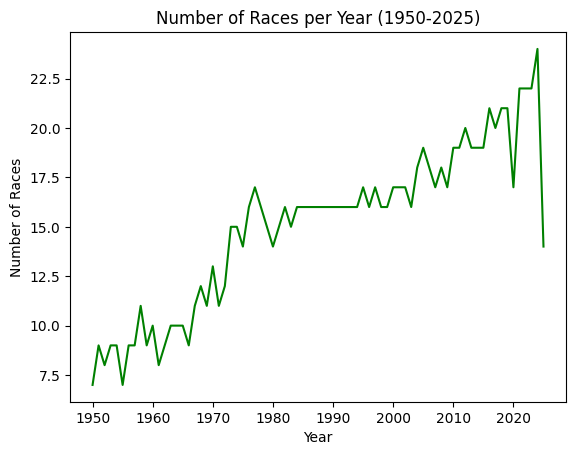

In [20]:
# Wins per year
wins_per_year = df.groupby('year')['grand_prix'].count()

plt.figure()
sns.lineplot(x=wins_per_year.index, y=wins_per_year.values, color="green")
plt.title("Number of Races per Year (1950-2025)")
plt.xlabel("Year")
plt.ylabel("Number of Races")
plt.show()

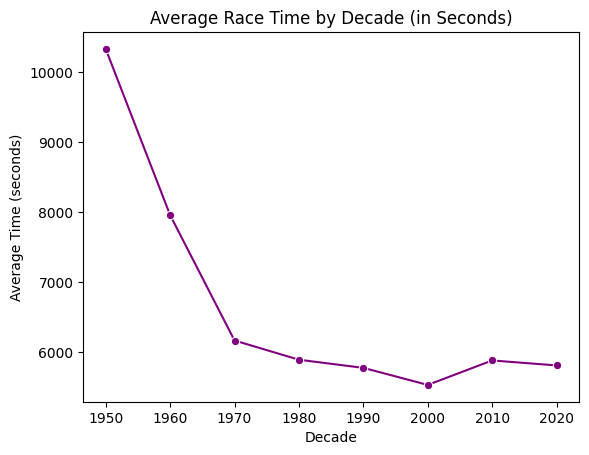

In [21]:
# Average race time per decade
df['decade'] = (df['year'] // 10) * 10
avg_time_by_decade = df.groupby('decade')['time_seconds'].mean()

plt.figure()
sns.lineplot(x=avg_time_by_decade.index, y=avg_time_by_decade.values, marker="o", color="purple")
plt.title("Average Race Time by Decade (in Seconds)")
plt.xlabel("Decade")
plt.ylabel("Average Time (seconds)")
plt.show()

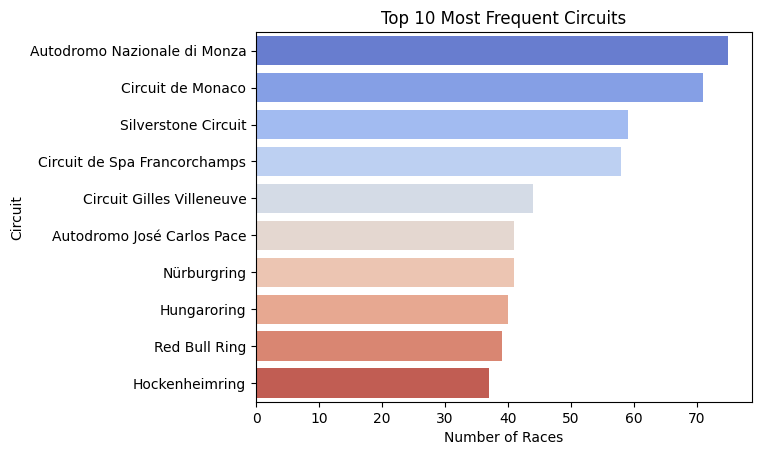

In [22]:
# Top circuits
top_circuits = df['circuit'].value_counts().head(10)

plt.figure()
sns.barplot(x=top_circuits.values, y=top_circuits.index, palette="coolwarm")
plt.title("Top 10 Most Frequent Circuits")
plt.xlabel("Number of Races")
plt.ylabel("Circuit")
plt.show()

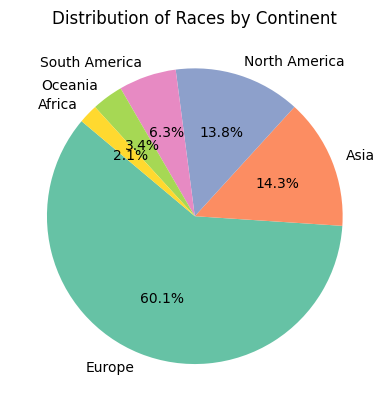

In [23]:
# Continent distribution of races
continent_counts = df['continent'].value_counts()

plt.figure()
plt.pie(continent_counts.values, labels=continent_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Distribution of Races by Continent")
plt.show()

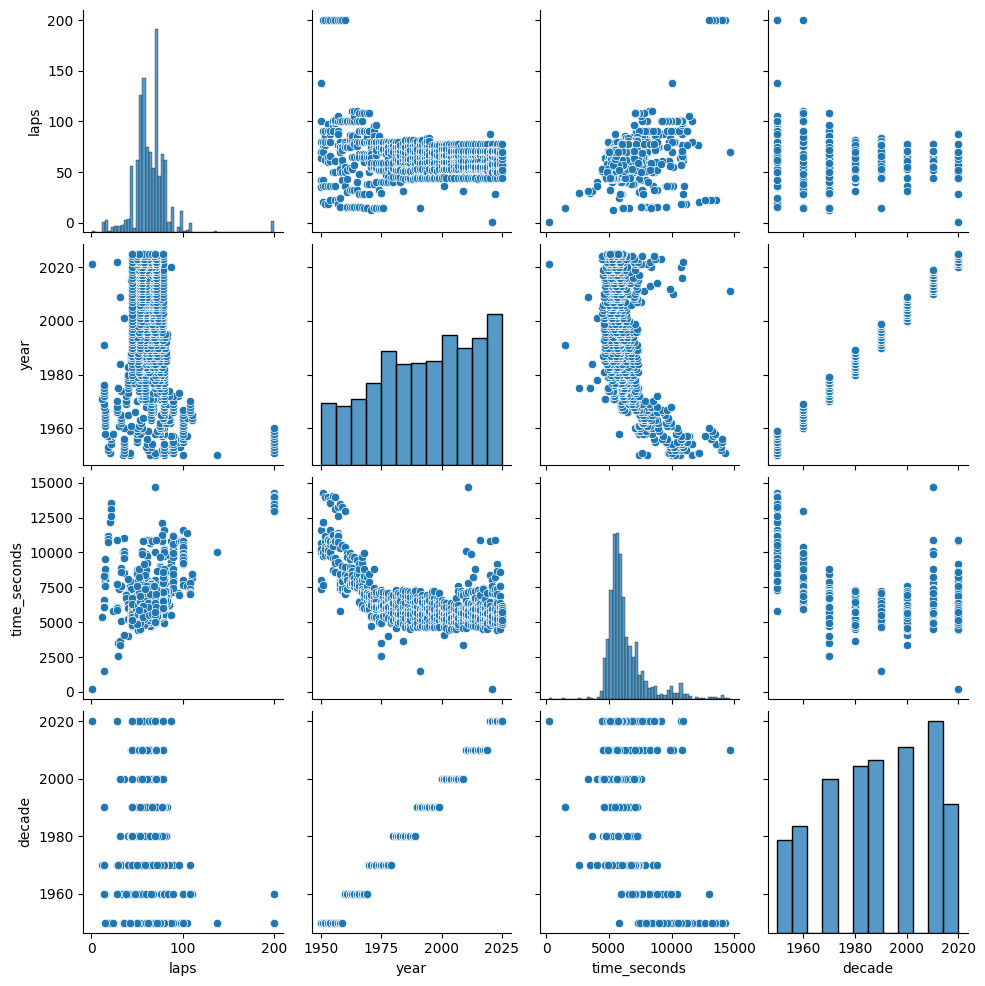

In [24]:
sns.pairplot(df)
plt.show()

Performing Linear Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
df_model = df.drop(columns=["date", "time"])

# Identifying features and targets
X = df_model.drop(columns=["laps"])
y = df_model["laps"]

# Identifying categorical columns
categorical_cols = ["continent", "grand_prix", "circuit", "winner_name", "team"]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the pipeline with linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Training the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Making predictions
y_pred = pipeline.predict(X_test)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 8.02
Mean Squared Error: 150.35
Root Mean Squared Error: 12.26
R-squared: 0.61


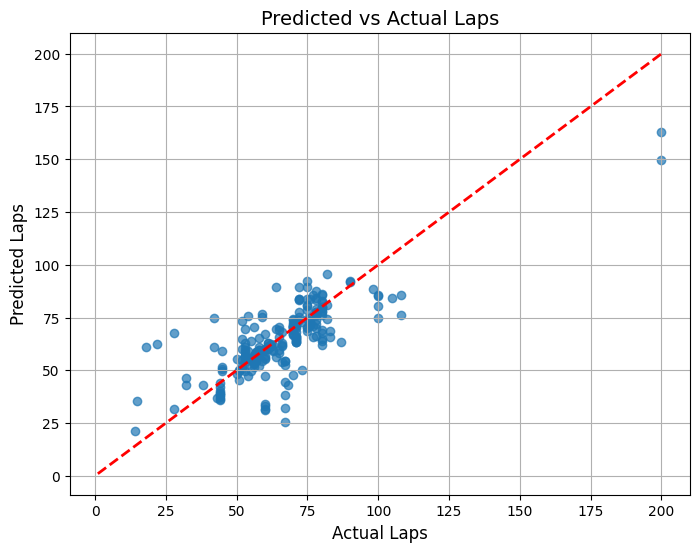

In [27]:
# Scatter plot of actual vs predicted laps
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title("Predicted vs Actual Laps", fontsize=14)
plt.xlabel("Actual Laps", fontsize=12)
plt.ylabel("Predicted Laps", fontsize=12)
plt.grid(True)
plt.show()

Random Forest Regressor


In [28]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Building pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict
rf_y_pred = rf_pipeline.predict(X_test)

# Evaluate
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest - Mean Absolute Error: {rf_mae:.2f}")
print(f"Random Forest - Mean Squared Error: {rf_mse:.2f}")
print(f"Random Forest - Root Mean Squared Error: {rf_rmse:.2f}")
print(f"Random Forest - R-squared: {rf_r2:.2f}")


Random Forest - Mean Absolute Error: 4.09
Random Forest - Mean Squared Error: 59.35
Random Forest - Root Mean Squared Error: 7.70
Random Forest - R-squared: 0.85


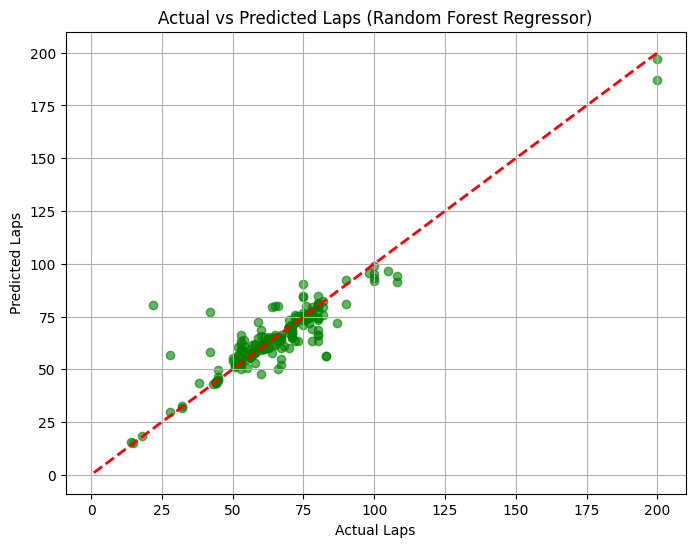

In [29]:
# Scatter plot for Random Forest predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_y_pred, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Laps")
plt.ylabel("Predicted Laps")
plt.title("Actual vs Predicted Laps (Random Forest Regressor)")
plt.grid(True)
plt.show()
